In [25]:
#importing the required libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
#the focussed Library
from keras.regularizers import l1,l2,l1_l2

In [26]:
#Boston_Housing dataset for saving time in training
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [27]:
#initializing Handler for the StandardScaler function
h_one=StandardScaler()
h_one.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
#Dinmensions of the train
x_train.shape

(404, 13)

In [29]:
#Dinmensions of the test
x_test.shape

(102, 13)

In [30]:
#model transformation by standard scalar
x_test=h_one.transform(x_test)
x_train=h_one.transform(x_train)

In [31]:
#creating model using l1 Regularization
model_l1_r=Sequential()
model_l1_r.add(Dense(units=128,activation="relu",kernel_regularizer=keras.regularizers.l1(l1=0.01),input_shape=(13,)))
model_l1_r.add(Dropout(0.1))
model_l1_r.add(Dense(units=64,activation="relu"))
model_l1_r.add(Dropout(0.1))
model_l1_r.add(Dense(units=16,activation="relu"))
model_l1_r.add(Dense(units=1))

In [32]:
#creating model using l2 Regularization
model_l2_r=Sequential()
model_l2_r.add(Dense(units=128,activation="relu",kernel_regularizer=keras.regularizers.l2(l2=0.01),input_shape=(13,)))
model_l2_r.add(Dropout(0.1))
model_l2_r.add(Dense(units=64,activation="relu"))
model_l2_r.add(Dropout(0.1))
model_l2_r.add(Dense(units=16,activation="relu"))
model_l2_r.add(Dense(units=1))

In [33]:
#creating model using l1 and l2 Regularization
model_l12_r=Sequential()
model_l12_r.add(Dense(units=128,activation="relu",kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01),input_shape=(13,)))
model_l12_r.add(Dropout(0.1))
model_l12_r.add(Dense(units=64,activation="relu"))
model_l12_r.add(Dropout(0.1))
model_l12_r.add(Dense(units=16,activation="relu"))
model_l12_r.add(Dense(units=1))

In [34]:
#L1 model summary
model_l1_r.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1792      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 11,105
Trainable params: 11,105
Non-trainable params: 0
__________________________________________________

In [38]:
#L2 model summary
model_l2_r.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1792      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 11,105
Trainable params: 11,105
Non-trainable params: 0
__________________________________________________

In [39]:
#L1 L2 model summary
model_l12_r.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1792      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 11,105
Trainable params: 11,105
Non-trainable params: 0
__________________________________________________

In [40]:
#Compiling all the models
model_l1_r.compile(loss="mse",optimizer="adam",metrics=['mse'])
model_l2_r.compile(loss="mse",optimizer="adam",metrics=['mse'])
model_l12_r.compile(loss="mse",optimizer="adam",metrics=['mse'])

In [50]:
#Training L1
Mod_l1=model_l1_r.fit(x_train,y_train,batch_size=1,callbacks=[EarlyStopping(patience=3)],epochs=100,validation_split=0.2)

Epoch 1/100
323/323 [==============================] - 1s 3ms/step - loss: 19.7933 - mse: 17.9581 - val_loss: 18.5226 - val_mse: 16.6955
Epoch 2/100
323/323 [==============================] - 1s 2ms/step - loss: 16.8203 - mse: 15.0057 - val_loss: 17.0045 - val_mse: 15.1996
Epoch 3/100
323/323 [==============================] - 1s 2ms/step - loss: 13.4763 - mse: 11.6836 - val_loss: 17.8913 - val_mse: 16.1161
Epoch 4/100
323/323 [==============================] - 1s 2ms/step - loss: 12.6951 - mse: 10.9245 - val_loss: 13.8893 - val_mse: 12.1329
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 15.1853 - mse: 13.4355 - val_loss: 15.7755 - val_mse: 14.0363
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 14.6549 - mse: 12.9254 - val_loss: 27.5373 - val_mse: 25.8123
Epoch 7/100
323/323 [==============================] - 1s 2ms/step - loss: 12.4608 - mse: 10.7528 - val_loss: 21.5167 - val_mse: 19.8125


In [52]:
#Training L2
Mod_l2=model_l2_r.fit(x_train,y_train,batch_size=1,callbacks=[EarlyStopping(patience=3)],epochs=100,validation_split=0.2)

Epoch 1/100
323/323 [==============================] - 1s 2ms/step - loss: 255.8761 - mse: 255.6155 - val_loss: 25.2409 - val_mse: 24.9531
Epoch 2/100
323/323 [==============================] - 1s 2ms/step - loss: 18.6685 - mse: 18.3816 - val_loss: 17.2687 - val_mse: 16.9787
Epoch 3/100
323/323 [==============================] - 1s 2ms/step - loss: 17.8779 - mse: 17.5886 - val_loss: 16.2072 - val_mse: 15.9164
Epoch 4/100
323/323 [==============================] - 1s 2ms/step - loss: 20.2285 - mse: 19.9387 - val_loss: 15.9760 - val_mse: 15.6860
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 15.5158 - mse: 15.2267 - val_loss: 20.1815 - val_mse: 19.8920
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 16.6235 - mse: 16.3347 - val_loss: 18.1632 - val_mse: 17.8753
Epoch 7/100
323/323 [==============================] - 1s 2ms/step - loss: 14.1688 - mse: 13.8775 - val_loss: 18.4104 - val_mse: 18.1220


In [53]:
#Training L1 and L2 model
Mod_l12=model_l12_r.fit(x_train,y_train,batch_size=1,callbacks=[EarlyStopping(patience=3)],epochs=100,validation_split=0.2)

Epoch 1/100
323/323 [==============================] - 1s 2ms/step - loss: 257.8210 - mse: 255.7912 - val_loss: 26.8044 - val_mse: 24.6833
Epoch 2/100
323/323 [==============================] - 1s 2ms/step - loss: 19.8681 - mse: 17.7453 - val_loss: 17.5322 - val_mse: 15.4231
Epoch 3/100
323/323 [==============================] - 1s 2ms/step - loss: 23.0918 - mse: 20.9847 - val_loss: 15.6799 - val_mse: 13.5839
Epoch 4/100
323/323 [==============================] - 1s 2ms/step - loss: 19.3289 - mse: 17.2413 - val_loss: 14.4353 - val_mse: 12.3656
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 16.6366 - mse: 14.5754 - val_loss: 13.1062 - val_mse: 11.0600
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 16.6570 - mse: 14.6188 - val_loss: 15.5140 - val_mse: 13.4935
Epoch 7/100
323/323 [==============================] - 1s 2ms/step - loss: 13.7092 - mse: 11.6886 - val_loss: 18.8531 - val_mse: 16.8523
Epoch 8/100
323/323 [==================

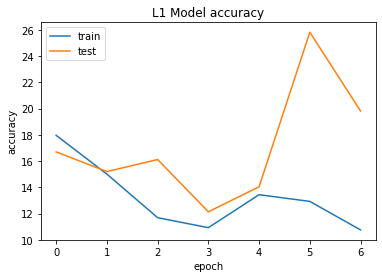

In [56]:
#L1 plot
import matplotlib.pyplot as plt
plt.plot(Mod_l1.history['mse'])
plt.plot(Mod_l1.history['val_mse'])
plt.title('L1 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

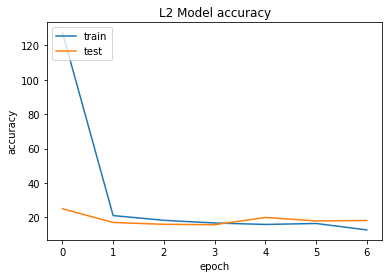

In [57]:
#L2 Plot
import matplotlib.pyplot as plt
plt.plot(Mod_l2.history['mse'])
plt.plot(Mod_l2.history['val_mse'])
plt.title('L2 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

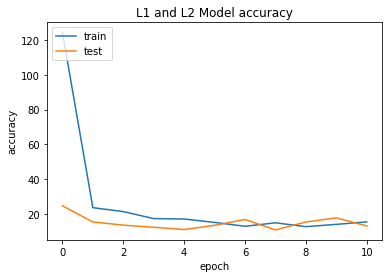

In [58]:
#L1 and L2 Plot
import matplotlib.pyplot as plt
plt.plot(Mod_l12.history['mse'])
plt.plot(Mod_l12.history['val_mse'])
plt.title('L1 and L2 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()